# imports

In [1]:
import pandas as pd
import numpy as np
import ast
from functions import *
import matplotlib.pyplot as plt
from matplotlib import cm

# fix data

In [60]:
def convert_to_floats(value):
    if value[:2] == '[[':
        nested_list = ast.literal_eval(value)
        return [item[0] for item in nested_list]
    return value  # Return the original value if not a string

def printer(value):
    if value[:2] == '[[':
        print(value)
        print()
    return value


df = pd.read_csv('data.csv')


df['probability'] = df['probability'].apply(convert_to_floats)

df.to_csv('data.csv', index=False)

# Plot thermal noisy data

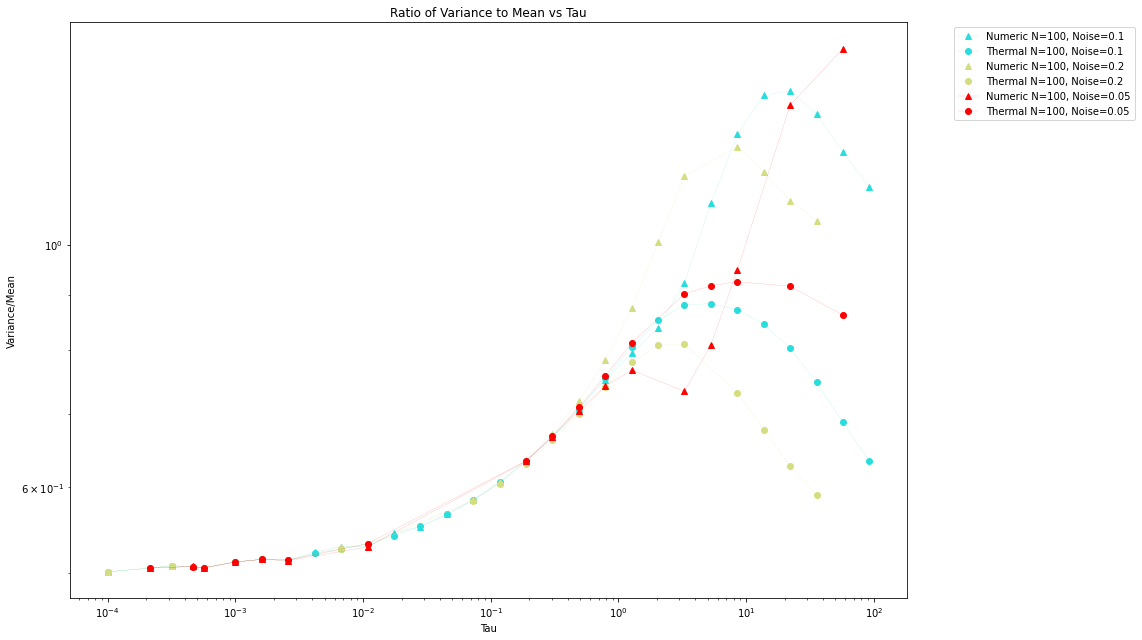

In [46]:
# Load the data from the CSV file
N = 100
data = get_data_in_range(N, 0, 100, 0.05, 0.2)
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels) + 1)) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data = data[(data['type'] == 'thermal') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio = thermal_data['variance'] / thermal_data['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy+1], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=0.1, markersize=6)
    plt.plot(thermal_data['tau'], thermal_ratio, color=colors[idy+1], label=f'Thermal N={N}, Noise={noise}', marker='o', linewidth=0.1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


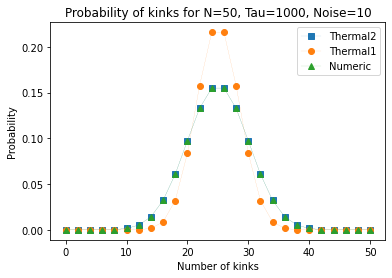

In [6]:
# Load the data from the CSV file
N = 50
tau = 1000
noise = 10
data = get_data_in_range(N, tau, tau , noise, noise)
num_prob = np.array(ast.literal_eval(data[data['type'] == 'numeric']['probability'].iloc[0])).flatten()
thermal_prob1 = np.array(ast.literal_eval(data[data['type'] == 'thermal1']['probability'].iloc[0])).flatten()
thermal_prob2 = np.array(ast.literal_eval(data[data['type'] == 'thermal2']['probability'].iloc[0])).flatten()
kinks = [i*2 for i in range(len(num_prob))]
plt.plot(kinks, thermal_prob2, label='Thermal2', marker='s', linewidth=0.1, markersize=6)
plt.plot(kinks, thermal_prob1, label='Thermal1', marker='o', linewidth=0.1, markersize=6)
plt.plot(kinks, num_prob, label='Numeric', marker='^', linewidth=0.1, markersize=6)
plt.xlabel('Number of kinks')
plt.ylabel('Probability')
plt.title(f'Probability of kinks for N={N}, Tau={tau}, Noise={noise}')
plt.legend()
# plt.xlim(-1, 30)
name = f'kinks_prob_{N}_{tau}_{noise}.svg'
#plt.savefig(name)
plt.show()

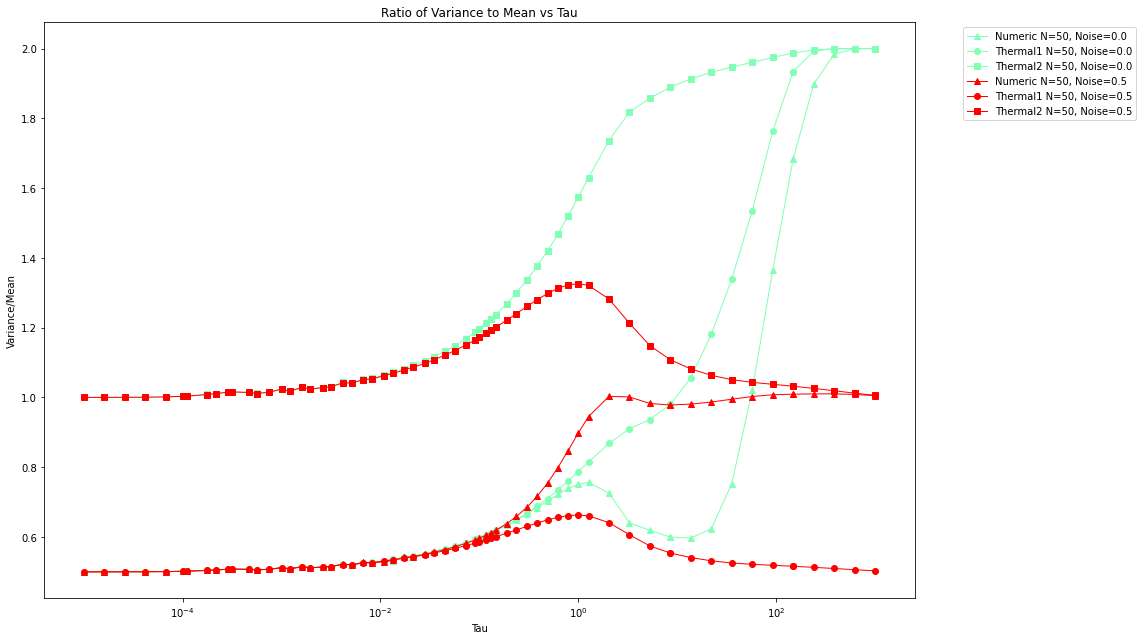

In [72]:
# Load the data from the CSV file
N = 50
data = get_data_in_range(N, 0, 100000, 0, 51)
data = data[(data['noise'] == 0) | (data['noise'] == 0.5)]
data = data[(data['type'] == 'numeric') | (data['type'] == 'thermal1') | (data['type'] == 'thermal2')]
plt.figure(figsize=(16, 9))

# Get unique noise levels
noise_levels = data['noise'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(noise_levels) + 1)) # type: ignore

# Iterate over noise levels for Numeric data
for idy, noise in enumerate(noise_levels):
    # Get the data in the tau range for the current N and noise
    num_data = data[(data['type'] == 'numeric') & (data['noise'] == noise)]
    thermal_data1 = data[(data['type'] == 'thermal1') & (data['noise'] == noise)]
    thermal_data2 = data[(data['type'] == 'thermal2') & (data['noise'] == noise)]

    # Calculate the ratio of the second cumulant to the first (variance/mean) for numeric data
    num_ratio = num_data['variance'] / num_data['mean']
    thermal_ratio1 = thermal_data1['variance'] / thermal_data1['mean']
    thermal_ratio2 = thermal_data2['variance'] / thermal_data2['mean']

    # Plot numeric data with different colors and labels
    plt.plot(num_data['tau'], num_ratio, color=colors[idy+1], label=f'Numeric N={N}, Noise={noise}', marker='^', linewidth=1, markersize=6)
    plt.plot(thermal_data1['tau'], thermal_ratio1, color=colors[idy+1], label=f'Thermal1 N={N}, Noise={noise}', marker='o', linewidth=1, markersize=6)
    plt.plot(thermal_data2['tau'], thermal_ratio2, color=colors[idy+1], label=f'Thermal2 N={N}, Noise={noise}', marker='s', linewidth=1, markersize=6)
    
    # Set labels, title, and legend
plt.xlabel('Tau')
plt.ylabel('Variance/Mean')
plt.title('Ratio of Variance to Mean vs Tau')

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xscale('log')
#plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
data = pd.read_csv('data.csv')


Ns = data['N'].unique()

taus = data['tau'].unique()
noises = data['noise'].unique()



print(Ns)
print(taus)
print(noises)

[ 50 100]
[1.00000000e-05 1.60000000e-05 2.60000000e-05 4.20000000e-05
 6.80000000e-05 1.00000000e-04 1.10000000e-04 1.78000000e-04
 2.15000000e-04 2.87000000e-04 3.16000000e-04 4.64000000e-04
 5.62000000e-04 7.50000000e-04 1.00000000e-03 1.21200000e-03
 1.61000000e-03 1.95700000e-03 2.59300000e-03 3.16200000e-03
 4.17500000e-03 5.10900000e-03 6.72300000e-03 8.25400000e-03
 1.08260000e-02 1.33350000e-02 1.74330000e-02 2.15440000e-02
 2.80720000e-02 3.48070000e-02 4.52040000e-02 5.62340000e-02
 7.27900000e-02 9.08520000e-02 1.00000000e-01 1.17210000e-01
 1.32000000e-01 1.46780000e-01 1.88739000e-01 2.37137000e-01
 3.03920000e-01 3.83119000e-01 4.89390000e-01 6.18966000e-01
 7.88046000e-01 1.00000000e+00 1.26896100e+00 2.04336000e+00
 3.29034500e+00 5.29831700e+00 8.53167900e+00 8.53167900e+00
 1.37382380e+01 2.21221630e+01 3.56224790e+01 5.73615250e+01
 9.23670860e+01 1.48735211e+02 1.48735211e+02 2.39502662e+02
 3.85662042e+02 6.21016942e+02 1.00000000e+03]
[0.0e+00 1.0e-03 1.0e-02 5.0

In [2]:
ks = np.linspace(0, np.pi, 20)
tau = 20
x = np.array([[0,1],[1,0]])
for w in [0, 0.1,0.3, 0.6, 10, 25]:
    pks = calk_noisy_pk(ks, tau, w, x)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()